<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skill_Assessment_2_Tabassum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

# 1st Presentation on 23rd Jan

#Who is working with whom Collaboration.


In [ ]:
from itertools import combinations
from collections import defaultdict

In [ ]:
# Creating a dictionary to count collaborations between each pair of authors
collaboration_counter = defaultdict(int)

for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author1, author2 in combinations(authors, 2):
        # Sort the pair to avoid duplicate entries (e.g., (A, B) is the same as (B, A))
        author_pair = tuple(sorted([author1, author2]))
        collaboration_counter[author_pair] += 1


In [ ]:
# Sorting the collaborations by their counts
sorted_collaborations = sorted(collaboration_counter.items(), key=lambda x: x[1], reverse=True)


In [ ]:
# Selecting the top 20 collaborations
top_collaborations = sorted_collaborations[:20]

In [ ]:

# Creating a DataFrame for the top collaborations
top_collaborations_df = pd.DataFrame(top_collaborations, columns=['Author Pair', 'Number of Collaborations'])
top_df = top_collaborations_df.head(20)  # Display the top 20 collaborations
top_df

,Author Pair,Number of Collaborations
0,"(Chen, Lin)",232
1,"(Li, Zhang)",204
2,"(Chen, Liu)",198
3,"(Chen, Wang)",186
4,"(Wang, Zhang)",186
5,"(Li, Wang)",182
6,"(Li, Liu)",181
7,"(Nguyen, Nguyen)",158
8,"(Chen, Li)",153
9,"(Chen, Wu)",153


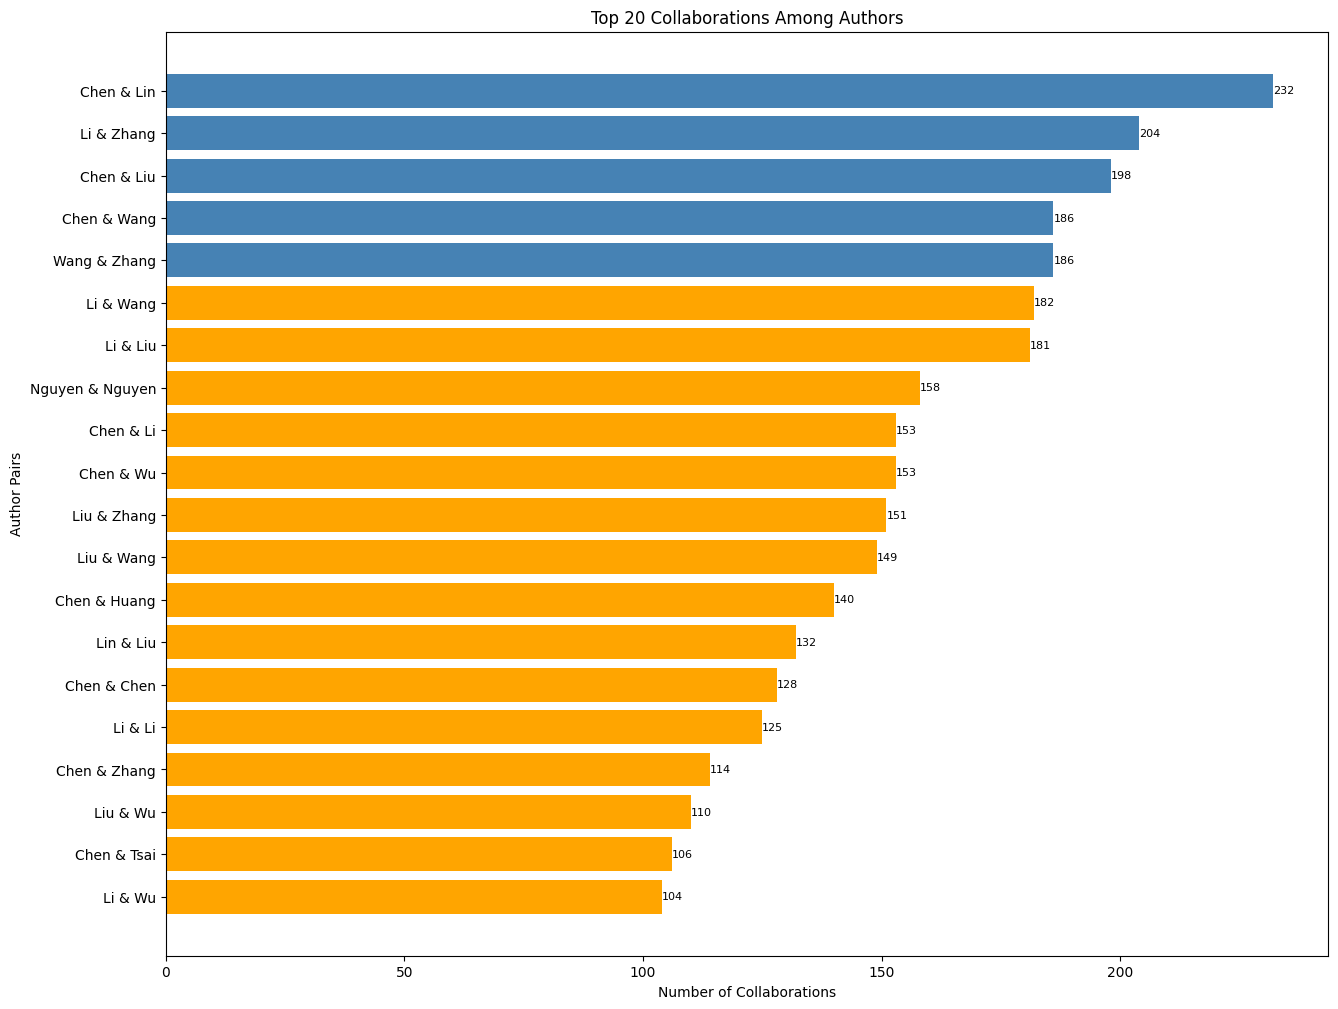

In [ ]:
import matplotlib.pyplot as plt

# Preparing data for plotting
author_pairs = [" & ".join(pair) for pair, _ in top_collaborations]
collaboration_counts = [count for _, count in top_collaborations]

# Improved visualization with enhanced readability and distinct coloring for top collaborations

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'orange' for i in range(len(collaboration_counts))]

# Plotting
plt.figure(figsize=(15, 12))
bars = plt.barh(author_pairs, collaboration_counts, color=colors)
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Pairs')
plt.title('Top 20 Collaborations Among Authors')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()

#Performing the visualization

In [ ]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
# Finding the top 5 authors based on the number of collaborations
author_collaboration_counts = defaultdict(int)

In [ ]:
for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author in authors:
        author_collaboration_counts[author] += len(authors) - 1  # Counting collaborations for each author


In [ ]:

# Sorting authors by their number of collaborations
sorted_authors = sorted(author_collaboration_counts.items(), key=lambda x: x[1], reverse=True)


In [ ]:
# Selecting the top 10 authors
top_5_authors = sorted_authors[:5]
top_5_authors_names = [author[0] for author in top_5_authors]


In [ ]:
# Creating a network graph for the top 10 authors
G_top_5 = nx.Graph()

for _, paper in authors_data.groupby('PMID'):
    authors = [author for author in paper['AuthorLastname'].tolist() if author in top_5_authors_names]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G_top_5.add_edge(authors[i], authors[j])


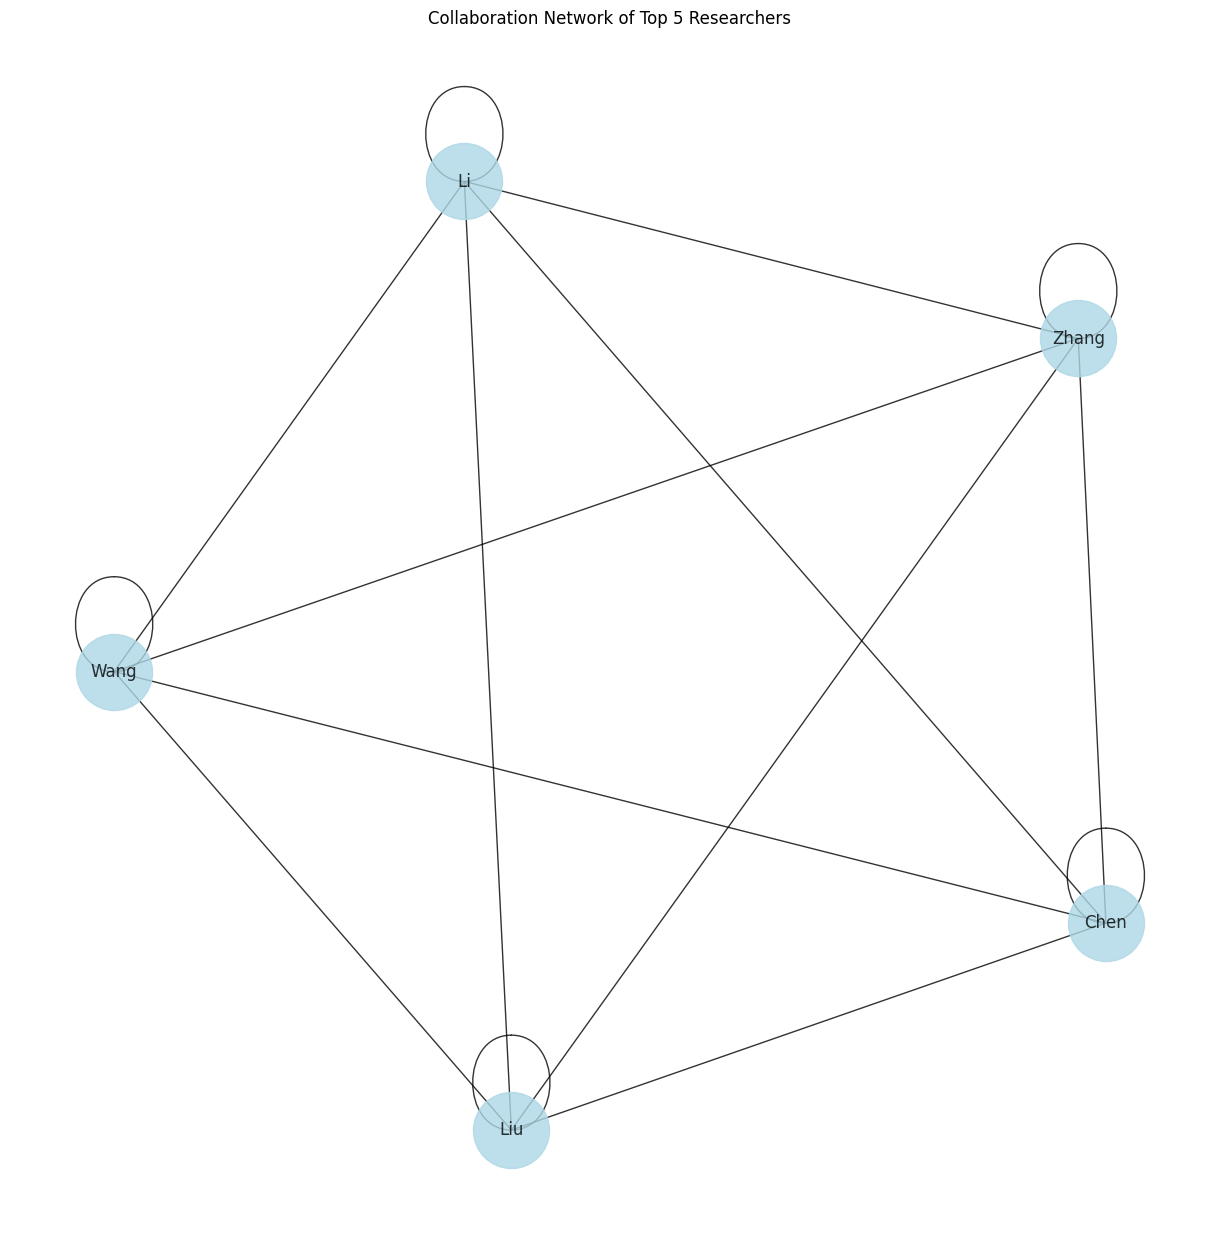

In [ ]:
# Drawing the network graph
plt.figure(figsize=(12, 12))
nx.draw(G_top_5, with_labels=True, node_size=3000, node_color='lightblue', alpha=0.8, font_size=12)
plt.title("Collaboration Network of Top 5 Researchers")

plt.savefig('plot.png')
plt.show()

In [ ]:
# Commenting the code as the network is too complex for now to understand
import networkx as nx

In [ ]:
# Creating a network graph for the top collaborations
G = nx.Graph()

In [ ]:
# Adding edges with weights (number of collaborations)
for (author1, author2), count in top_collaborations:
    G.add_edge(author1, author2, weight=count)

In [ ]:
# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

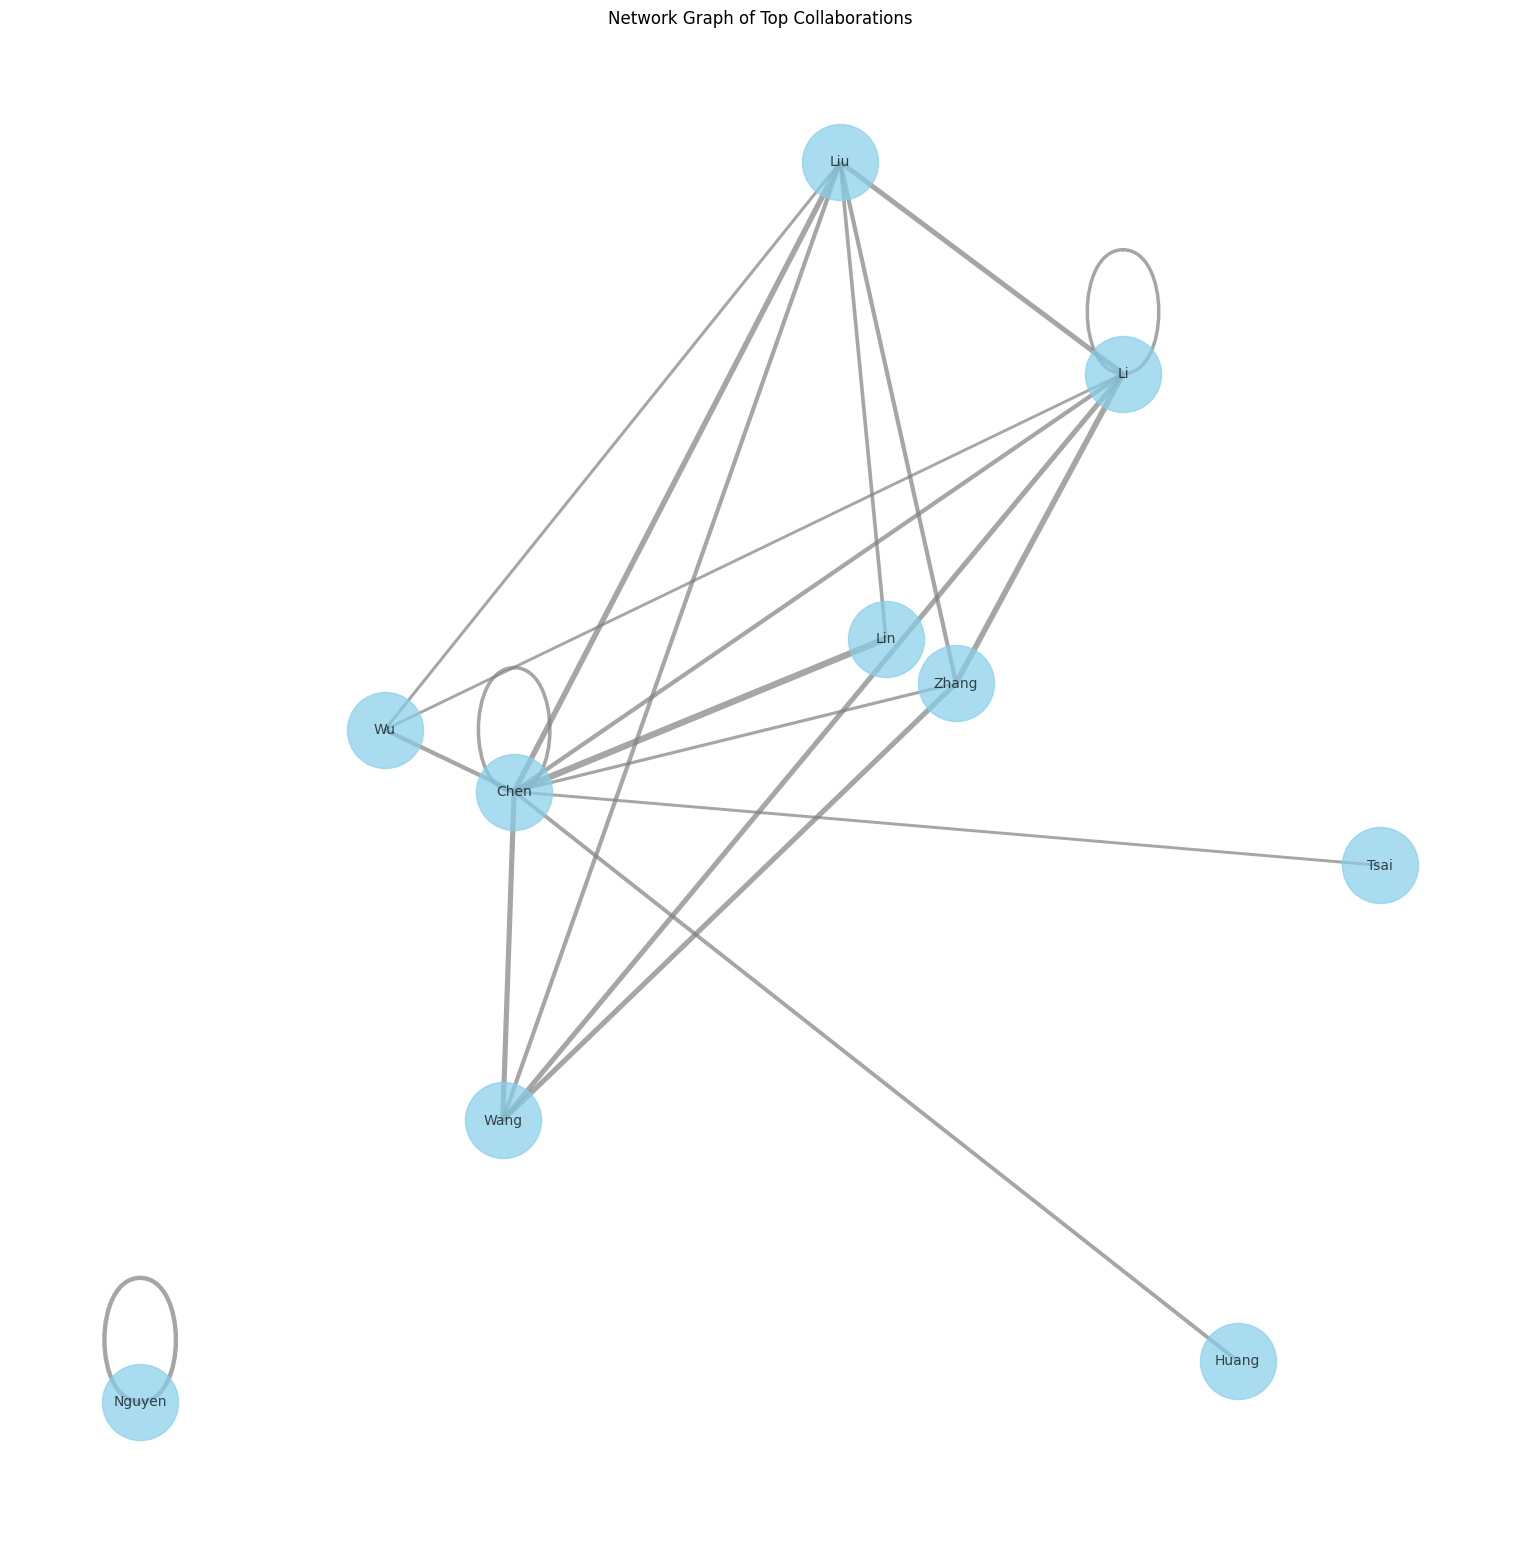

In [ ]:
# Drawing the network graph
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', alpha=0.7,
        width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color='gray', font_size=10)
plt.title('Network Graph of Top Collaborations')
plt.show()

# Presentation on 30th Jan

# For Clean Data

In [90]:
article_clean_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
author_clean_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a subset of authors_df with relevant columns
authors_sub_df = author_clean_data[['PMID', 'AuthorLastname', 'AuthorInitials']]

# Creating a DataFrame for pairs of authors who worked together on the same paper
# This is done by merging the authors dataframe with itself on PMID
author_pairs = pd.merge(author_clean_data, author_clean_data, on='PMID')

# Removing rows where an author is paired with themselves
author_pairs = author_pairs[author_pairs['AuthorLastname_x'] != author_pairs['AuthorLastname_y']]

# Creating a combined key for each pair (to aggregate counts)
author_pairs['pair_key'] = author_pairs.apply(lambda row: tuple(sorted([
    str(row['AuthorLastname_x']) + str(row['AuthorInitials_x']),
    str(row['AuthorLastname_y']) + str(row['AuthorInitials_y'])
])), axis=1)
# Counting the number of collaborations for each pair
collaboration_counts = author_pairs['pair_key'].value_counts()

author_pairs

,PMID,AuthorN_x,AuthorForename_x,AuthorLastname_x,AuthorInitials_x,AuthorAffiliation_x,AuthorN_y,AuthorForename_y,AuthorLastname_y,AuthorInitials_y,AuthorAffiliation_y,pair_key
1,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",2,J G,Rigau-Pérez,JG,NaN,"(DechantEJ, Rigau-PérezJG)"
2,10548291,2,J G,Rigau-Pérez,JG,NaN,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...","(DechantEJ, Rigau-PérezJG)"
5,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",2,M M,Khin,MM,NaN,"(JirakanjanakitN, KhinMM)"
6,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",3,S,Yoksan,S,NaN,"(JirakanjanakitN, YoksanS)"
7,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",4,N,Bhamarapravati,N,NaN,"(BhamarapravatiN, JirakanjanakitN)"
...,...,...,...,...,...,...,...,...,...,...,...,...
658521,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",1,Marta,Álvarez-García,M,"Aparato Digestivo, Hospital Universitario Fund...","(Calvo HernándezR, Álvarez-GarcíaM)"
658522,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...","(Calvo HernándezR, OteguiL)"
658523,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...","(Calvo HernándezR, Ortega LarrodéA)"
658526,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",2,Md,Kamrujjaman,M,"Department of Mathematics, University of Dhaka...","(Al MobinM, KamrujjamanM)"


In [ ]:
collaboration_counts

(BalmasedaA, HarrisE)        98
(LinYS, YehTM)               74
(AmadorM, BarreraR)          64
(LeoYS, LyeDC)               60
(MalavigeGN, OggGS)          60
                             ..
(ChenSR, LeeJC)               2
(HuHC, LeeJC)                 2
(LeeJC, WuYC)                 2
(BacklundA, LeeJC)            2
(Al MobinM, KamrujjamanM)     2
Name: pair_key, Length: 245719, dtype: int64

In [89]:
import matplotlib.pyplot as plt

# Extracting the top 20 collaborations
top_20_collaborations = collaboration_counts.head(20)

# Preparing data for the bar plot
pairs = [" & ".join(pair) for pair in top_20_collaborations.index]
counts = top_20_collaborations.values

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'orange' for i in range(len(top_20_collaborations))]

# Creating the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(pairs, counts, color= colors)
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Pairs')
plt.title('Top 20 Author Collaborations')
plt.gca().invert_yaxis()   # Invert y-axis to display the highest value on top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()

TypeError: can only join an iterable

In [8]:
top5 = top_20_collaborations.head(5)
top5

(BalmasedaA, HarrisE)    98
(LinYS, YehTM)           74
(AmadorM, BarreraR)      64
(LeoYS, LyeDC)           60
(MalavigeGN, OggGS)      60
Name: pair_key, dtype: int64

In [54]:
# Reducing the dataset size by considering only the top 50 collaborations
top_50_collaborations = collaboration_counts.head(50)

top_50_collaborations


(BalmasedaA, HarrisE)                98
(LinYS, YehTM)                       74
(AmadorM, BarreraR)                  64
(LeoYS, LyeDC)                       60
(MalavigeGN, OggGS)                  60
(KuraneI, TakasakiT)                 58
(SasmonoRT, YohanB)                  58
(FayeO, SallAA)                      54
(LimjindapornT, YenchitsomanusPT)    52
(SimmonsCP, WillsB)                  52
(JeewandaraC, MalavigeGN)            50
(LeoYS, TheinTL)                     50
(MoiML, TakasakiT)                   50
(GomesL, MalavigeGN)                 50
(OoiEE, TanHC)                       48
(EndyTP, NisalakA)                   46
(SetteA, WeiskopfD)                  46
(LinYS, LiuHS)                       46
(GreenS, RothmanAL)                  46
(LiuHS, YehTM)                       46
(GomesL, OggGS)                      46
(JeewandaraC, OggGS)                 44
(DurbinAP, WhiteheadSS)              44
(KhannaN, SwaminathanS)              44
(LeiHY, LinYS)                       42


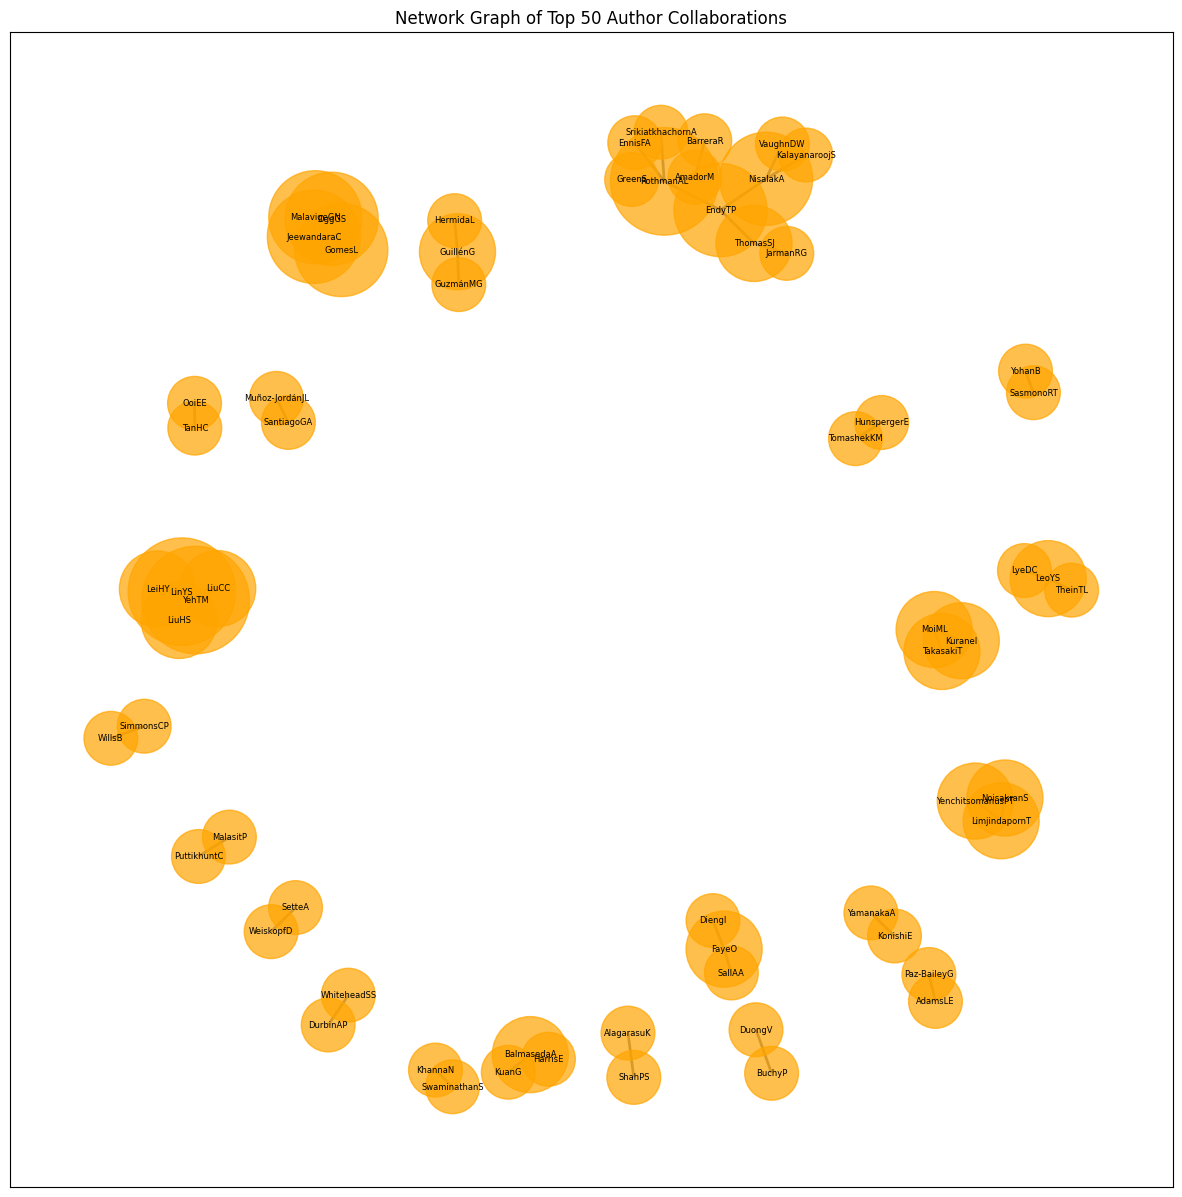

In [55]:
# Considering the top 50 collaborations

# Creating a reduced network graph for the top 50 collaborations
G_top_50 = nx.Graph()

# Adding nodes with weights (number of collaborations) for the top 50 collaborations only
for pair, count in top_50_collaborations.items():
    G_top_50.add_edge(pair[0], pair[1], weight=count)

# Drawing the network graph for top 50 collaborations
plt.figure(figsize=(15, 15))
pos_top_50 = nx.spring_layout(G_top_50, k=0.5)  # Adjusted 'k' value for spacing
nx.draw_networkx_nodes(G_top_50, pos_top_50, node_size=[G_top_50.degree(node)*1500 for node in G_top_50], node_color='orange', alpha=0.7)
nx.draw_networkx_edges(G_top_50, pos_top_50, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G_top_50, pos_top_50, font_size=6)
plt.title("Network Graph of Top 50 Author Collaborations")
plt.savefig('network.png')
plt.show()

In [91]:
from itertools import combinations
from collections import defaultdict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [92]:
# Example preprocessing steps
author_clean_data.dropna(inplace=True)  # Drop rows with missing values
authors_df = author_clean_data.drop_duplicates()

In [93]:
 # Creating a map of PMID to authors
pmid_authors_map = {}
for _, row in authors_df.iterrows():
    pmid = row['PMID']
    author = (row['AuthorForename'], row['AuthorLastname'])
    if pmid in pmid_authors_map:
            pmid_authors_map[pmid].add(author)
    else:
           pmid_authors_map[pmid] = {author}

# Counting the collaborations for each researcher
researcher_collaboration_count = {}
for pmid, authors in pmid_authors_map.items():
     for author in authors:
        if author in researcher_collaboration_count:
              researcher_collaboration_count[author] += len(authors) - 1
        else:
          researcher_collaboration_count[author] = len(authors) - 1



# Collaboration of 20 Researchers

In [105]:
# Identifying the top 20 researchers
top_20_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_researchers_list = [item[0] for item in top_20_researchers]


top_20_researchers

[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284)]

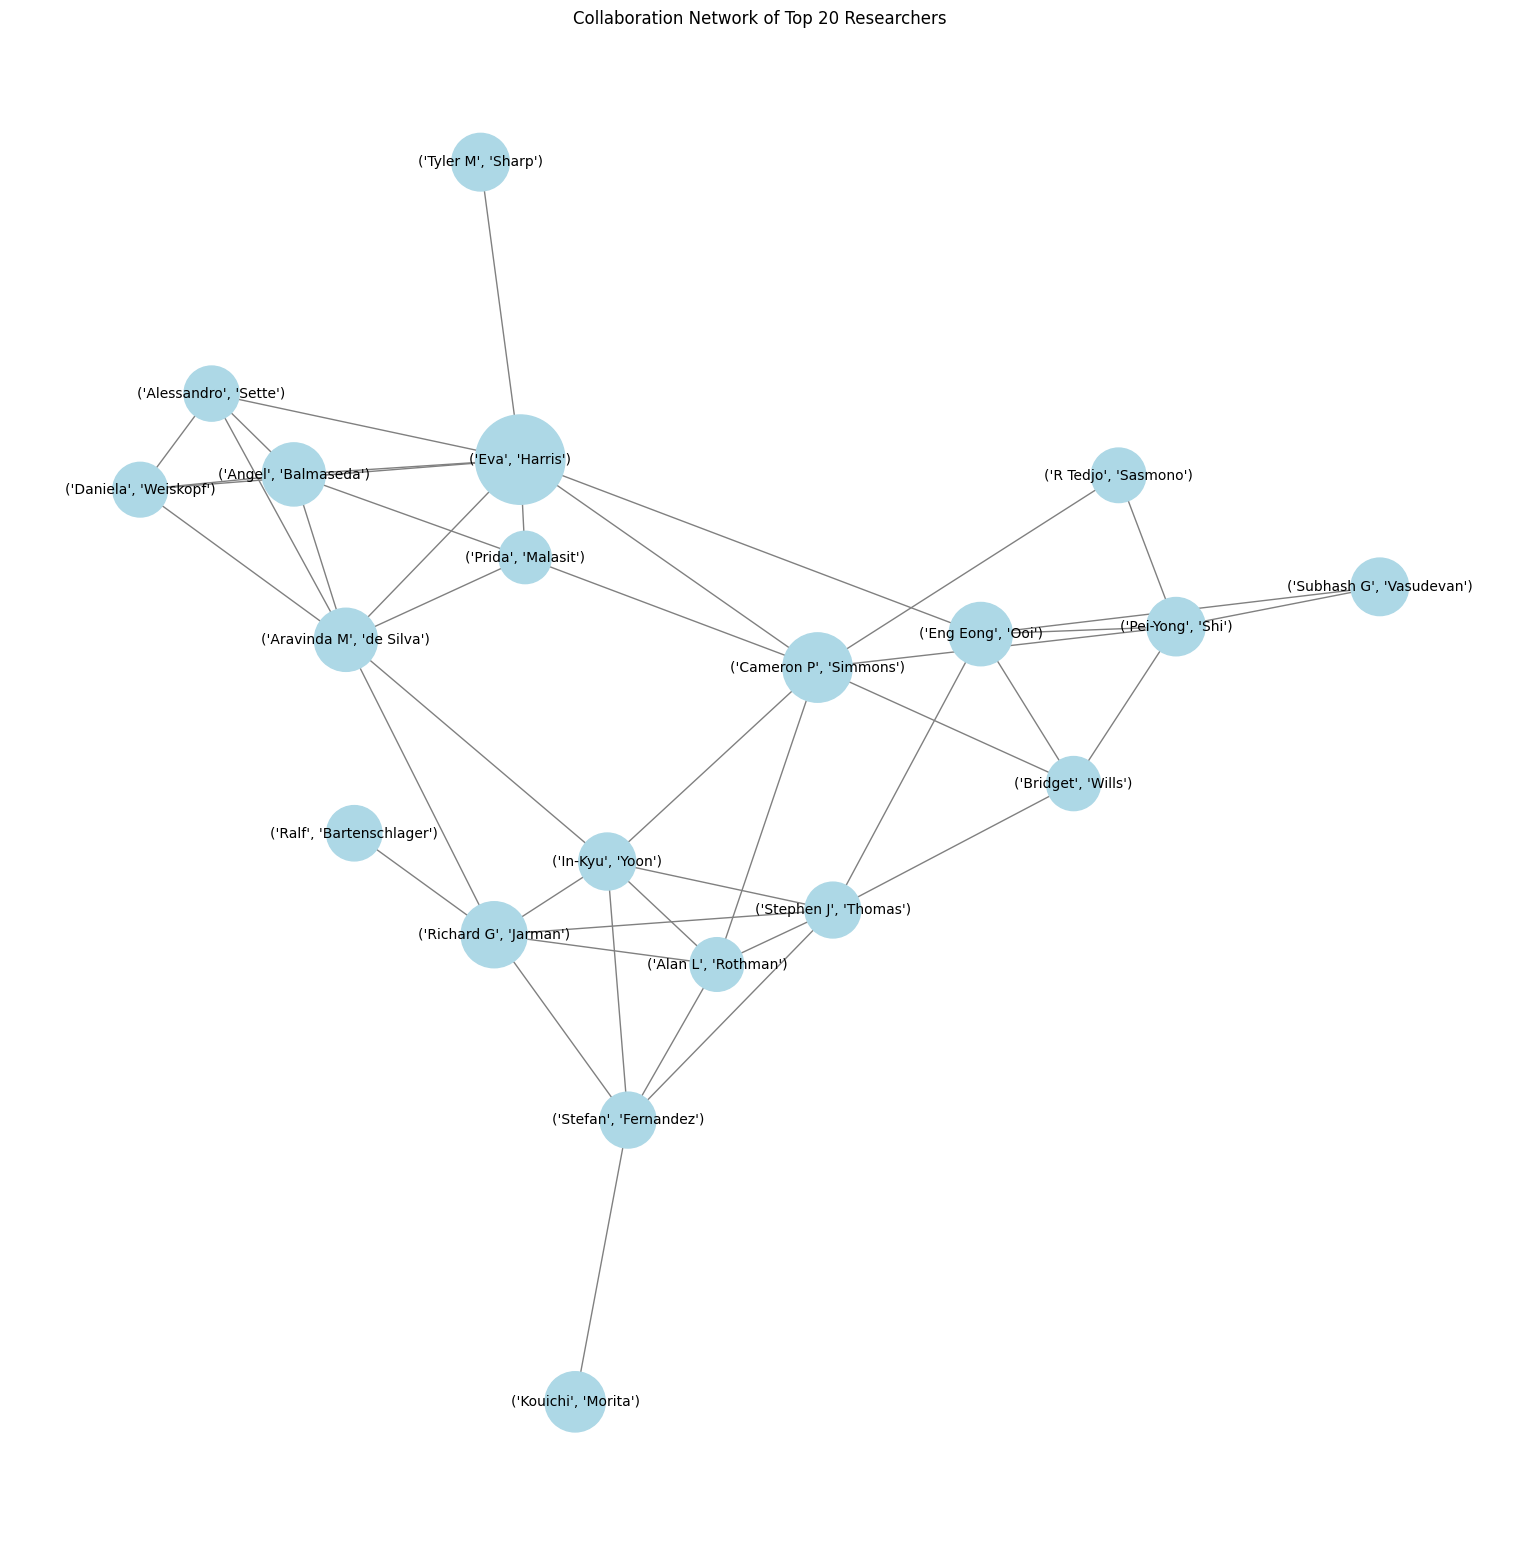

In [120]:

# Creating a subgraph with these top 20 researchers
top_20_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_20_researchers_list and author_pair[1] in top_20_researchers_list:
              top_20_researchers_subgraph.add_edge(*author_pair)

# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher]*5 for researcher in top_20_researchers_subgraph.nodes]
#weight = [researcher_collaboration_count[researcher]*100 for researcher in top_20_researchers_subgraph.nodes]
# Positioning the graph using spring layout for better visibility
#pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(15, 15))
nx.draw(top_20_researchers_subgraph,  with_labels=True, node_size=node_sizes, font_size=10, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 20 Researchers")
plt.savefig("top20.png")
plt.show()

In [102]:
# Identifying the top 30 researchers
top_30_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:30]
top_30_researchers_list = [item[0] for item in top_30_researchers]
top_30_researchers


[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284),
 (('Gabriela', 'Paz-Bailey'), 281),
 (('Stephen S', 'Whitehead'), 263),
 (('Duane J', 'Gubler'), 257),
 (('Kay M', 'Tomashek'), 244),
 (('Annelies', 'Wilder-Smith'), 242),
 (('Meng Ling', 'Moi'), 236),
 (('Thomas W', 'Scott'), 235),
 (('Anna P', 'Durbin'), 234),
 (('Amy C', 'Morrison'), 233),
 (('Yen-Hsu', 'Chen'), 232)]

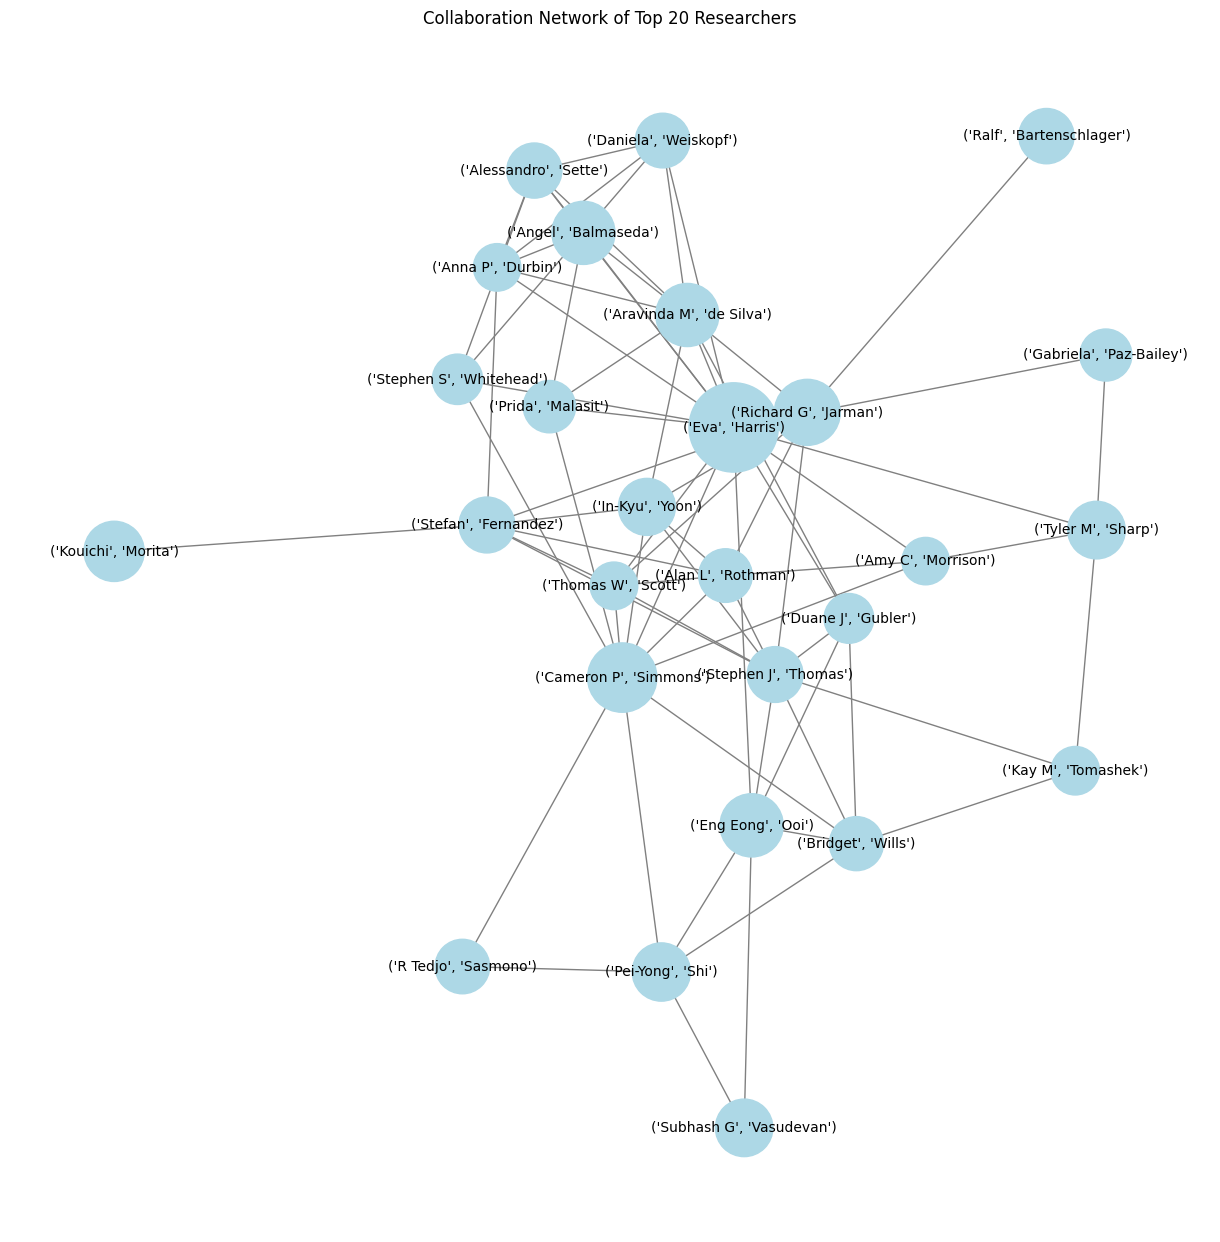

In [104]:

# Creating a subgraph with these top 20 researchers
top_30_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_20_researchers_list and author_pair[1] in top_30_researchers_list:
              top_30_researchers_subgraph.add_edge(*author_pair)

# Creating a network graph for the top collaborations
G = nx.Graph()
# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher]*5 for researcher in top_30_researchers_subgraph.nodes]

# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(12, 12))
nx.draw(top_30_researchers_subgraph, with_labels=True, node_size=node_sizes, font_size=10, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 30 Researchers")
plt.savefig("top20.png")
plt.show()

In [36]:
# Identifying the top 50 researchers
top_50_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:30]
top_50_researchers_list = [item[0] for item in top_50_researchers]
top_50_researchers

[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284),
 (('Gabriela', 'Paz-Bailey'), 281),
 (('Stephen S', 'Whitehead'), 263),
 (('Duane J', 'Gubler'), 257),
 (('Kay M', 'Tomashek'), 244),
 (('Annelies', 'Wilder-Smith'), 242),
 (('Meng Ling', 'Moi'), 236),
 (('Thomas W', 'Scott'), 235),
 (('Anna P', 'Durbin'), 234),
 (('Amy C', 'Morrison'), 233),
 (('Yen-Hsu', 'Chen'), 232)]

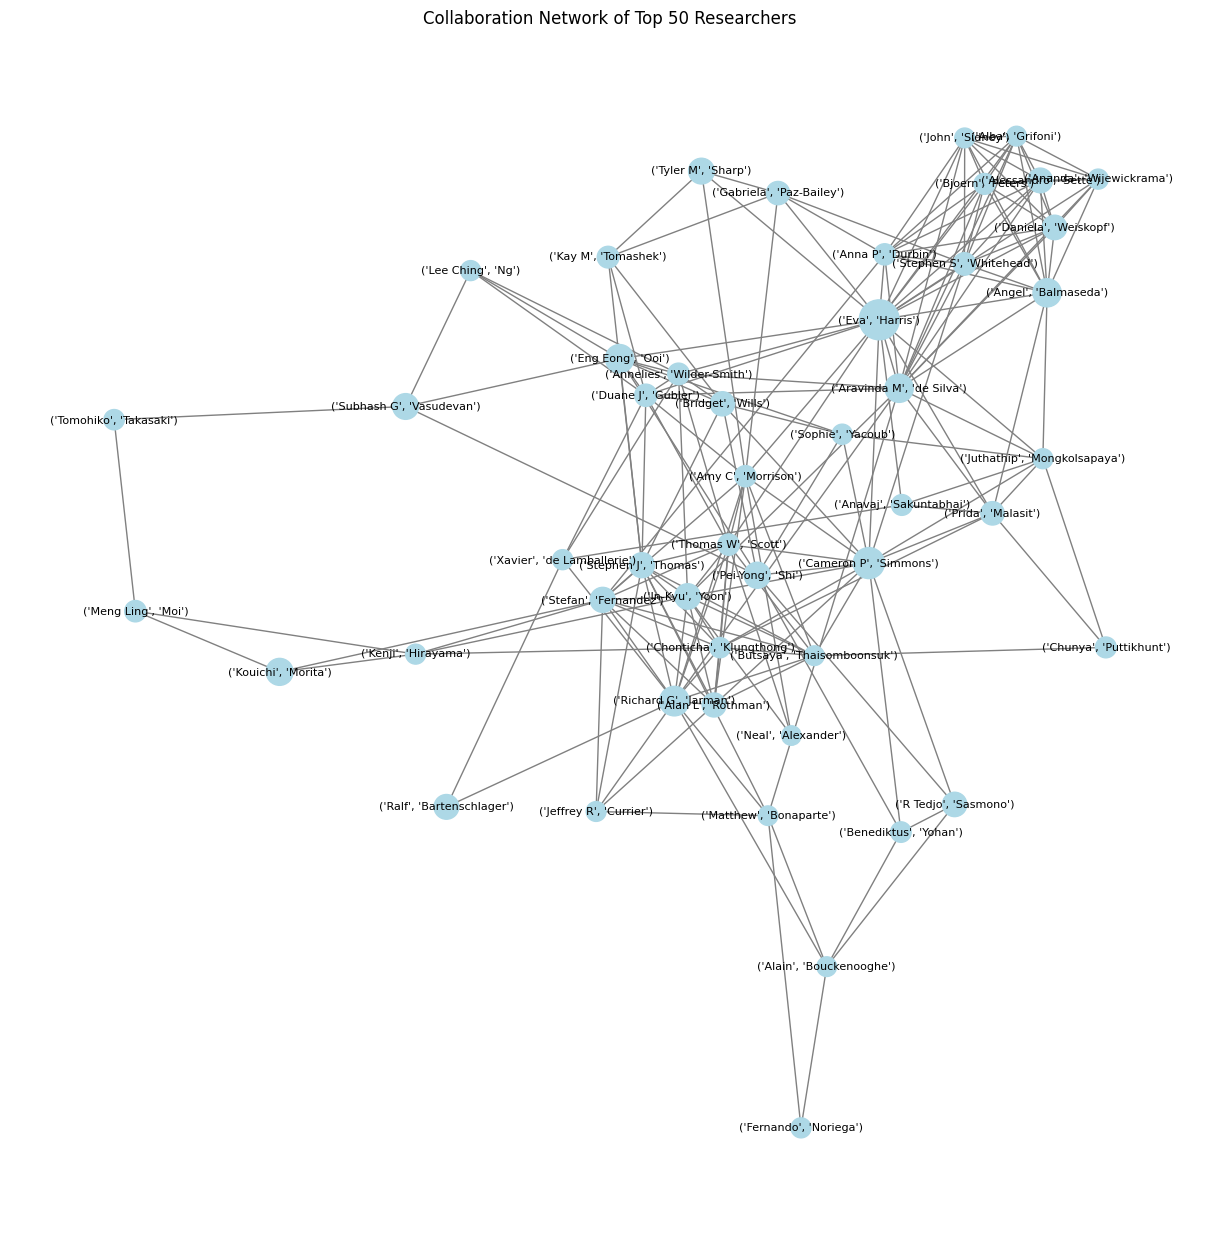

In [33]:
# Creating a subgraph with these top 50 researchers
top_50_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_50_researchers_list and author_pair[1] in top_50_researchers_list:
              top_50_researchers_subgraph.add_edge(*author_pair)

# Creating a network graph for the top collaborations
G = nx.Graph()
# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher] for researcher in top_50_researchers_subgraph.nodes]

# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(12, 12))
nx.draw(top_50_researchers_subgraph, with_labels=True, node_size=node_sizes, font_size=8, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 50 Researchers")
plt.savefig("top50.png")
plt.show()

# Collaboration of 50 Researchers

In [28]:
# Identifying the top 50 researchers
top_50_researchers = sorted(researcher_collaboration_count.items(), key=lambda x: x[1], reverse=True)[:50]
top_50_researchers_list = [item[0] for item in top_50_researchers]
top_50_researchers

[(('Eva', 'Harris'), 827),
 (('Cameron P', 'Simmons'), 499),
 (('Richard G', 'Jarman'), 452),
 (('Eng Eong', 'Ooi'), 415),
 (('Angel', 'Balmaseda'), 413),
 (('Aravinda M', 'de Silva'), 413),
 (('Kouichi', 'Morita'), 376),
 (('Pei-Yong', 'Shi'), 352),
 (('Tyler M', 'Sharp'), 344),
 (('Subhash G', 'Vasudevan'), 343),
 (('In-Kyu', 'Yoon'), 337),
 (('Stefan', 'Fernandez'), 324),
 (('Stephen J', 'Thomas'), 323),
 (('Ralf', 'Bartenschlager'), 317),
 (('Alessandro', 'Sette'), 315),
 (('Daniela', 'Weiskopf'), 310),
 (('R Tedjo', 'Sasmono'), 308),
 (('Bridget', 'Wills'), 303),
 (('Alan L', 'Rothman'), 298),
 (('Prida', 'Malasit'), 284),
 (('Gabriela', 'Paz-Bailey'), 281),
 (('Stephen S', 'Whitehead'), 263),
 (('Duane J', 'Gubler'), 257),
 (('Kay M', 'Tomashek'), 244),
 (('Annelies', 'Wilder-Smith'), 242),
 (('Meng Ling', 'Moi'), 236),
 (('Thomas W', 'Scott'), 235),
 (('Anna P', 'Durbin'), 234),
 (('Amy C', 'Morrison'), 233),
 (('Yen-Hsu', 'Chen'), 232),
 (('Bjoern', 'Peters'), 226),
 (('Chunya'

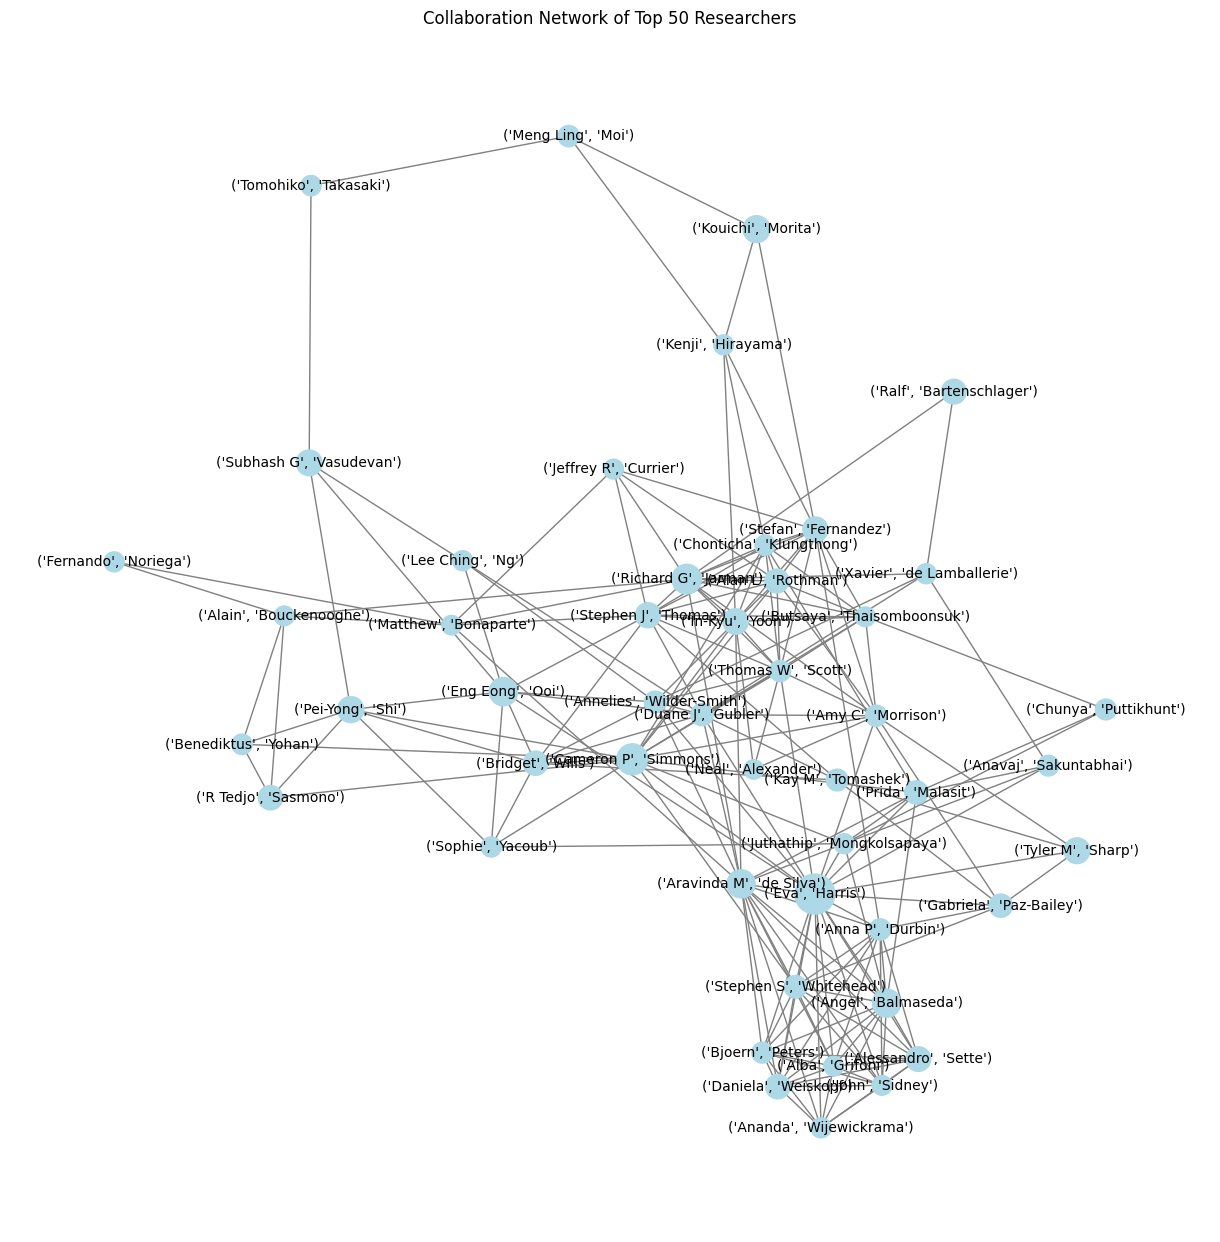

In [29]:
# Creating a subgraph with these top 50 researchers
top_50_researchers_subgraph = nx.Graph()
for authors in pmid_authors_map.values():
     for author_pair in combinations(authors, 2):
          if author_pair[0] in top_50_researchers_list and author_pair[1] in top_50_researchers_list:
              top_50_researchers_subgraph.add_edge(*author_pair)

# Creating a network graph for the top collaborations
G = nx.Graph()
# Preparing node sizes based on the number of collaborations
node_sizes = [researcher_collaboration_count[researcher] for researcher in top_50_researchers_subgraph.nodes]

# Positioning the graph using spring layout for better visibility
pos = nx.spring_layout(G, k=0.5, iterations=1)

# Visualizing the top 20 researchers' collaboration subgraph with node sizes
plt.figure(figsize=(12, 12))
nx.draw(top_50_researchers_subgraph, with_labels=True, node_size=node_sizes, font_size=10, node_color="lightblue", width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color="gray")
plt.title("Collaboration Network of Top 50 Researchers")
plt.savefig("top50.png")
plt.show()

In [62]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [65]:
articles_data = articles_data.dropna(axis = 1, how = 'all')
authors_data = authors_data.dropna(axis = 1, how = 'all')

In [66]:
# Merging the authors with the articles data based on PMID
merged_df = pd.merge(authors_data, articles_data[['PMID', 'Year']], on='PMID')

# Grouping by authors and counting the number of articles
author_article_counts = merged_df.groupby(['AuthorForename', 'AuthorLastname', 'AuthorInitials'])['PMID'].nunique()
active_researchers = author_article_counts.sort_values(ascending=False).reset_index()
active_researchers.rename(columns={'PMID': 'NumberOfArticles'}, inplace=True)

# Display the top 10 active researchers
active_researchers.head(20)

,AuthorForename,AuthorLastname,AuthorInitials,NumberOfArticles
0,Eva,Harris,E,128
1,Cameron P,Simmons,CP,66
2,Eng Eong,Ooi,EE,66
3,Alan L,Rothman,AL,64
4,Subhash G,Vasudevan,SG,59
5,Pei-Yong,Shi,PY,54
6,Annelies,Wilder-Smith,A,53
7,Stephen J,Thomas,SJ,53
8,Tomohiko,Takasaki,T,51
9,Aravinda M,de Silva,AM,50


In [71]:
# Reading the CSV files
authors_df_latest = authors_data
articles_df_latest = articles_data

# Creating a new table as requested
# The table will have columns: PMID, AuthorForename, AuthorLastname, AuthorInitials, and a count of articles published by each author
authors_articles_table = authors_df_latest.copy()

# Adding a column for the count of articles published by each author
authors_articles_table['ArticleCount'] = authors_articles_table.groupby('AuthorLastname')['AuthorLastname'].transform('count')

# Displaying the first few rows of the new table
authors_articles_table.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,ArticleCount
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",1
1,10548291,2,J G,Rigau-Pérez,JG,NaN,12
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",1
3,10548309,2,M M,Khin,MM,NaN,2
4,10548309,3,S,Yoksan,S,NaN,38


In [72]:
# Merging the authors dataframe with the articles dataframe to include the article title
merged_authors_articles = pd.merge(authors_df_latest, articles_df_latest[['PMID', 'Title']], on='PMID', how='left')

# Selecting the required columns: PMID, AuthorForename, AuthorLastname, AuthorInitials, and Title
final_table = merged_authors_articles[['PMID', 'AuthorForename', 'AuthorLastname', 'AuthorInitials', 'Title']]

# Displaying the first few rows of the new table
final_table.head()

,PMID,AuthorForename,AuthorLastname,AuthorInitials,Title
0,10548291,E J,Dechant,EJ,Hospitalizations for suspected dengue in Puert...
1,10548291,J G,Rigau-Pérez,JG,Hospitalizations for suspected dengue in Puert...
2,10548309,N,Jirakanjanakit,N,Dynamics of susceptibility and transmissibilit...
3,10548309,M M,Khin,MM,Dynamics of susceptibility and transmissibilit...
4,10548309,S,Yoksan,S,Dynamics of susceptibility and transmissibilit...


In [77]:
# Creating a new table to show author pairs and the number of articles they worked on together

# Initializing a dictionary to store author pairs and their collaboration counts
author_pairs = {}

# Iterating through each article
for pmid, group in merged_authors_articles.groupby('PMID'):
    authors = group['AuthorFullName'].dropna().unique().tolist()

    # Creating pairs of authors and counting their collaborations
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            pair = tuple(sorted([authors[i], authors[j]]))  # Sorting to ensure consistency
            author_pairs[pair] = author_pairs.get(pair, 0) + 1

# Converting the author pairs dictionary to a DataFrame
author_pairs_df = pd.DataFrame(list(author_pairs.items()), columns=['AuthorPair', 'NumberOfArticles'])
author_pairs_df = author_pairs_df.sort_values(by='NumberOfArticles', ascending=False)

# Displaying the first few rows of the new table
author_pairs_df.head()

,AuthorPair,NumberOfArticles
9635,"(Angel Balmaseda, Eva Harris)",49
713,"(Trai-Ming Yeh, Yee-Shin Lin)",34
48901,"(Benediktus Yohan, R Tedjo Sasmono)",29
6925,"(Manuel Amador, Roberto Barrera)",28
3532,"(Ichiro Kurane, Tomohiko Takasaki)",27


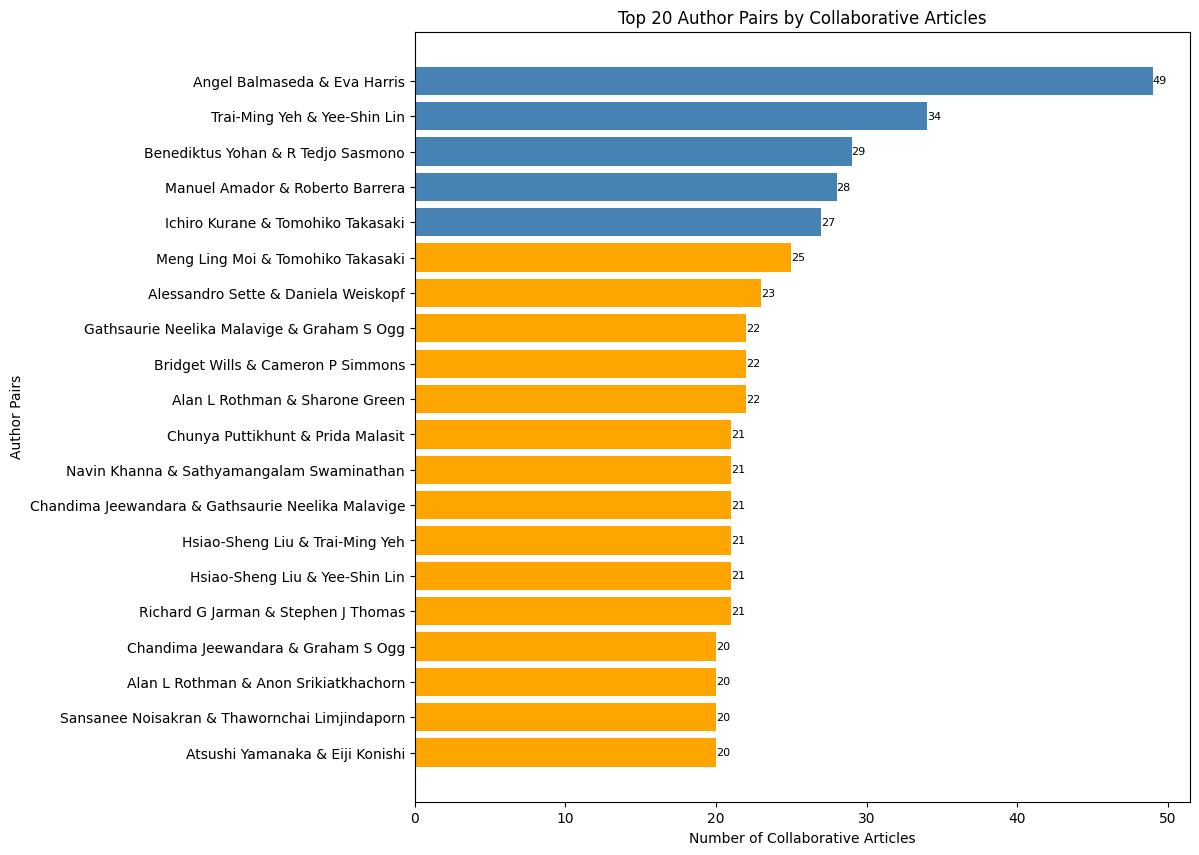

In [83]:
# Preparing data for the bar plot
# Selecting the top 20 author pairs for a clearer visualization
top_20_author_pairs = author_pairs_df.head(20)
pair_names = [" & ".join(pair) for pair in top_20_author_pairs['AuthorPair']]
collaboration_counts = top_20_author_pairs['NumberOfArticles']

# Improved visualization with enhanced readability and distinct coloring for top collaborations

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'orange' for i in range(len(collaboration_counts))]


# Plotting a bar plot for the top 10 author pairs
plt.figure(figsize=(10, 10))
bars = plt.barh(pair_names, collaboration_counts, color=colors)
plt.xlabel('Number of Collaborative Articles')
plt.ylabel('Author Pairs')
plt.title('Top 20 Author Pairs by Collaborative Articles')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top


# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')


plt.show()

In [85]:
top_5_author_pairs = author_pairs_df.head(5)
top_5_author_pairs

,AuthorPair,NumberOfArticles
9635,"(Angel Balmaseda, Eva Harris)",49
713,"(Trai-Ming Yeh, Yee-Shin Lin)",34
48901,"(Benediktus Yohan, R Tedjo Sasmono)",29
6925,"(Manuel Amador, Roberto Barrera)",28
3532,"(Ichiro Kurane, Tomohiko Takasaki)",27


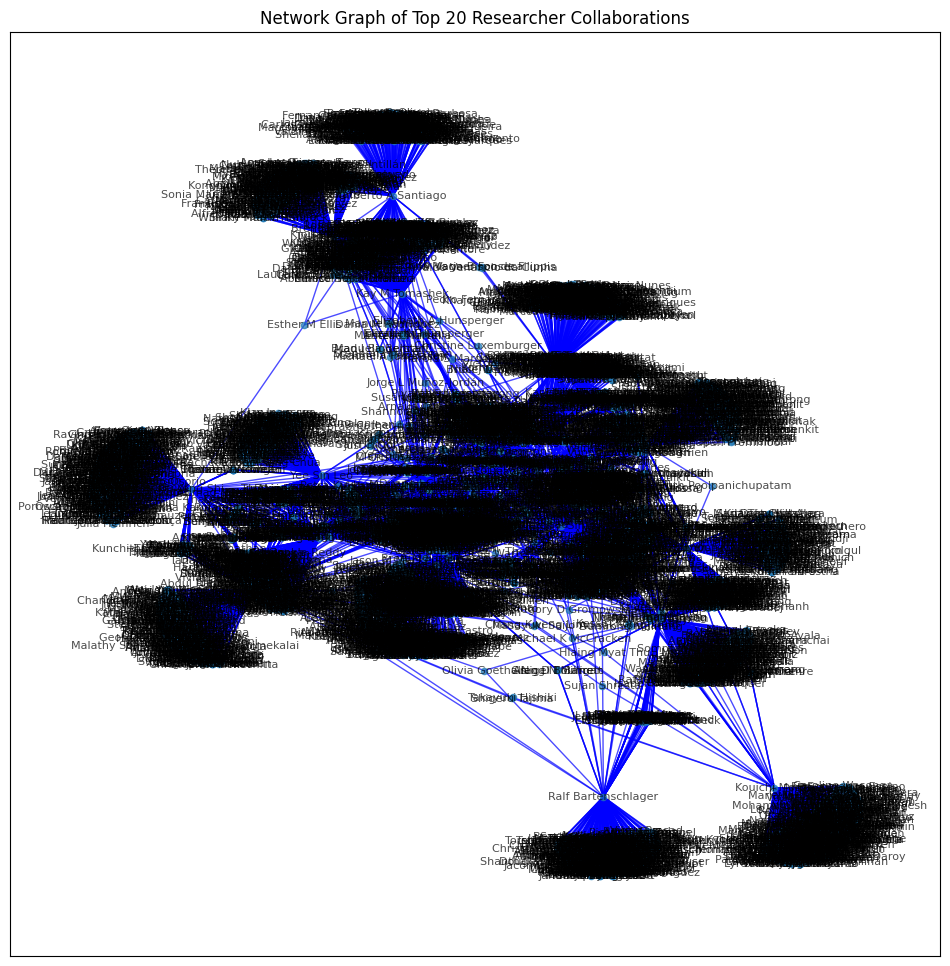

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a network graph
G = nx.Graph()

# Adding edges for the top 20 collaborations
for author, _ in top_20_collaborations:
    collaborators = revised_collaborations_dict.get(author, [])
    for collaborator in collaborators:
        G.add_edge(author, collaborator)

# Plotting the network graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=True, node_size=20, font_size=8, alpha=0.7, edge_color='blue')
plt.title("Network Graph of Top 20 Researcher Collaborations")
plt.show()

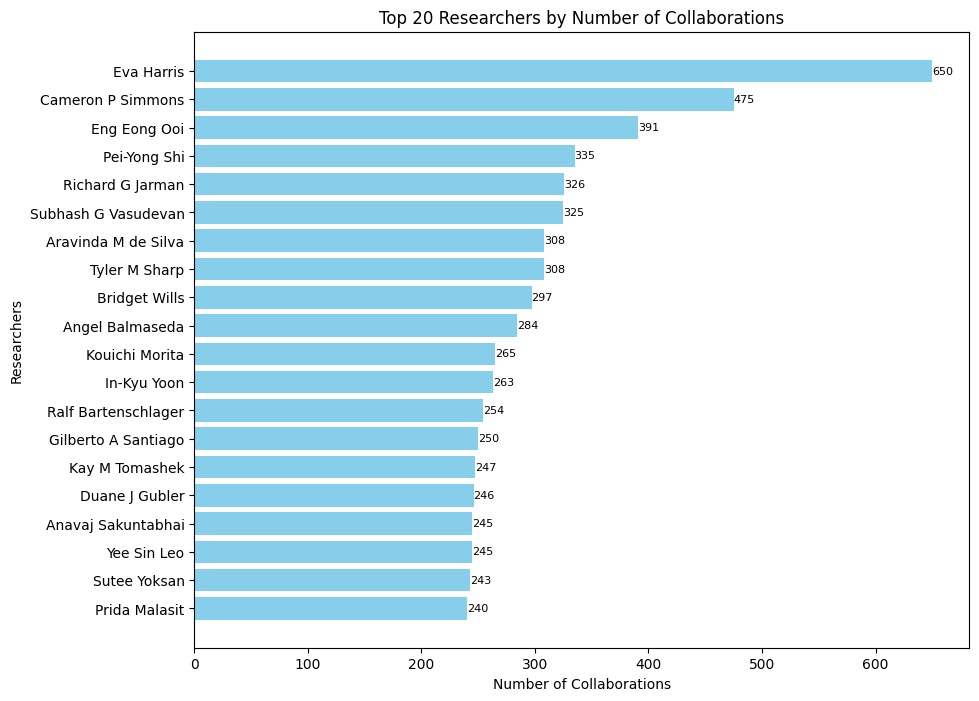

In [76]:
# Extracting author names and their collaboration counts for the bar graph
authors = [author for author, _ in top_20_collaborations]
collaboration_counts = [count for _, count in top_20_collaborations]

# Plotting a horizontal bar graph for the top 20 collaborations
plt.figure(figsize=(10, 8))
bars = plt.barh(authors, collaboration_counts, color='skyblue')
plt.xlabel('Number of Collaborations')
plt.ylabel('Researchers')
plt.title('Top 20 Researchers by Number of Collaborations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top


# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()